# Flight Data Exploration

### By Shane Patterson

## Preliminary Wrangling

This document explores a dataset collected by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) on all domestic flights.  The particular data sets I chose are from 1988 and 2008 and contains 29 separate variables.  I want to see how much has changed, or possibly stayed the same after 20 years, regarding flying.  Also, 2008 is the most recent data available and will be the most accurate when comparing to today's data.

In [3]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

# suppress warnings
import warnings
warnings.simplefilter("ignore")

In [4]:
# loading in datasets
flights2008 = pd.read_csv('2008.csv')
flights1988 = pd.read_csv('1988.csv')
carriers = pd.read_csv('carriers.csv')
airports = pd.read_csv('airports.csv')

In [5]:
# high-level overview of 2008 df
print(flights2008.shape)
print(flights2008.dtypes)
print(flights2008.head(10))

(7009728, 29)
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object
   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      1           3          4   2003.0        1955  

In [6]:
# I'm curious if the most popular carriers are still the same from 1988 to 2008
print(flights2008.groupby(['Year','UniqueCarrier'])['Year'].agg(['count']).sort_values(by='count', ascending=False))
print(flights1988.groupby(['Year','UniqueCarrier'])['Year'].agg(['count']).sort_values(by='count', ascending=False))

                      count
Year UniqueCarrier         
2008 WN             1201754
     AA              604885
     OO              567159
     MQ              490693
     US              453589
     DL              451931
     UA              449515
     XE              374510
     NW              347652
     CO              298455
     EV              280575
     9E              262208
     FL              261684
     YV              254930
     OH              197607
     B6              196091
     AS              151102
     F9               95762
     HA               61826
     AQ                7800
                     count
Year UniqueCarrier        
1988 DL             753983
     AA             694757
     UA             587144
     US             494383
     PI             470957
     CO             457031
     NW             431440
     EA             389292
     TW             275819
     WN             262422
     HP             180871
     AS              89822
     P

It looks like many of the same airlines are in the top ten still: Delta, United Airlines, American Airlines.  Southwest and Sky West are two of the newcomers dominating the data set in 2008, in terms of flight frequency.

### What is/are the main feature(s) of interest in your dataset?

I'm highly interested in digging into the in and outs of delays at the airport and where they stem from. Hopefully I can put together some insightful visualizations to go along with this, as well. I'm also interested in analyzing the carriers to see if any trends emerge.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I believe a main factor delays occurs at the airport involve bad weather and I expect this to be the main driver when digging into the data set.

### Which airlines have the longest delays? 2008 and 1988 data sets are included

For the lmplots, the 1988 data shows a slightly wider dispersion when comparing the Arrival and Departure Delays, by carrier.  Whereas the 2008 visualization shows a much tighter dispersion.  A carrier that stands out to me is AMerican Airlines; they went from having some of the lowest Arrival and Departure delays to having the highest combination by mean. 

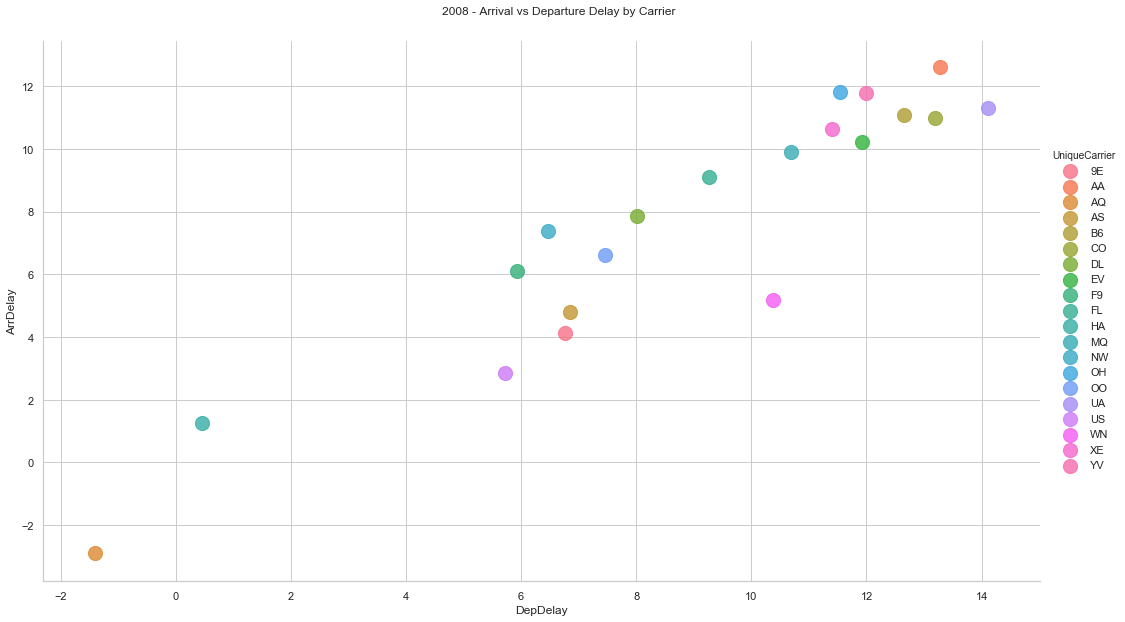

In [14]:
carrier_avg2008 = flights2008.groupby('UniqueCarrier').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).reset_index()
sns.lmplot('DepDelay', 'ArrDelay', data=carrier_avg2008, fit_reg=False, hue='UniqueCarrier', scatter_kws={"s": 200}, height = 8.27, aspect = (14.7/8.27))

plt.suptitle('2008 - Arrival vs Departure Delay by Carrier', y = 1.04)
plt.show()


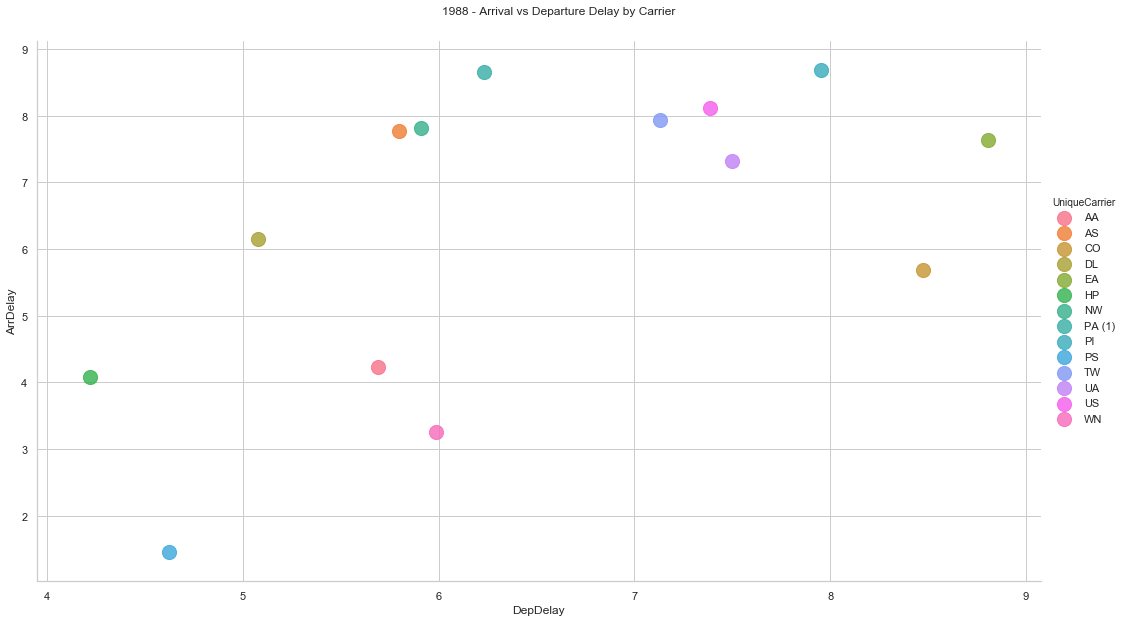

In [15]:
carrier_avg1988 = flights1988.groupby('UniqueCarrier').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).reset_index()
sns.lmplot('DepDelay', 'ArrDelay', data=carrier_avg1988, fit_reg=False, hue='UniqueCarrier', scatter_kws={"s": 200}, height = 8.27, aspect = (14.7/8.27))
plt.suptitle('1988 - Arrival vs Departure Delay by Carrier', y = 1.04)
plt.show()

Aside from a few carriers in 1988, the Arrival delays outweighed the Departure delays in most cases.  It is quite the opposite in the 2008 dataset, as many of the carriers are averaging a higher departure delay; some by as many as five minutes (Southwest Airlines)

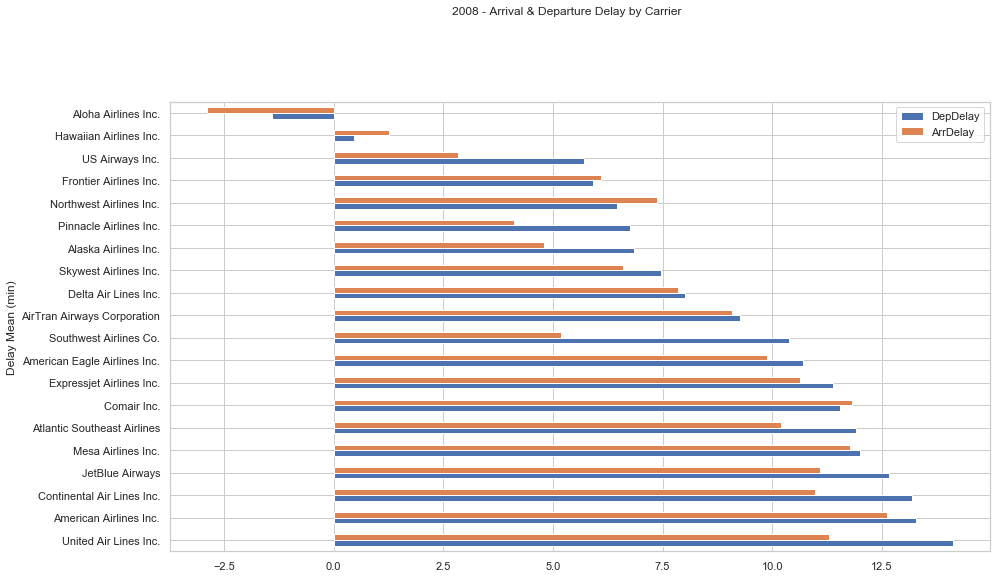

In [10]:
carrier_dict = dict(carriers.values)
flights2008.groupby('UniqueCarrier').agg({'DepDelay':'mean', 'ArrDelay':'mean'}) \
            .rename(index=carrier_dict) \
            .sort_values('DepDelay', ascending=False).plot.barh(figsize=[14.70, 8.27])
plt.suptitle('2008 - Arrival & Departure Delay by Carrier', y = 1.04)
plt.ylabel('Delay Mean (min)')
plt.show()

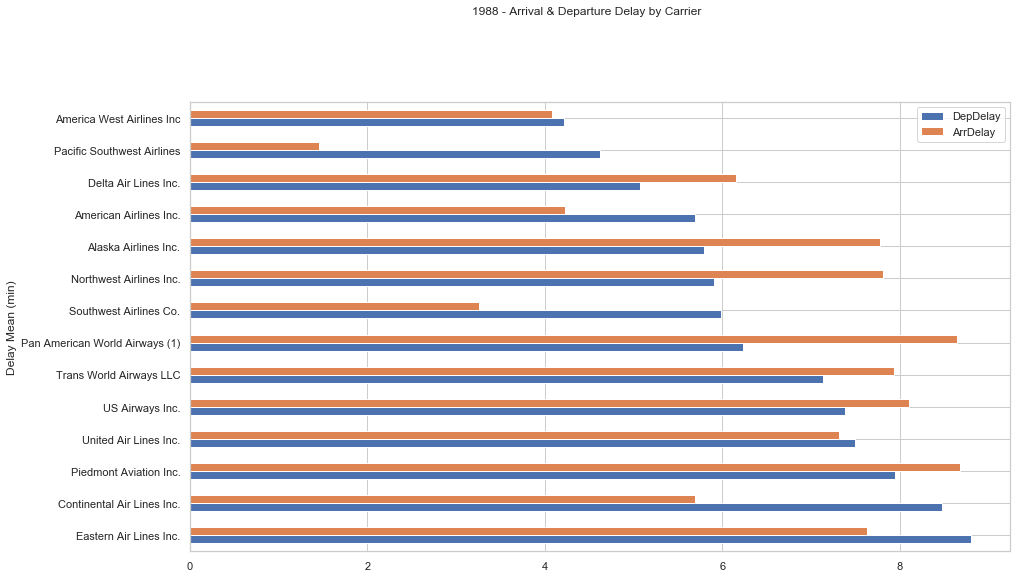

In [11]:
carrier_dict = dict(carriers.values)
flights1988.groupby('UniqueCarrier').agg({'DepDelay':'mean', 'ArrDelay':'mean'}) \
            .rename(index=carrier_dict) \
            .sort_values('DepDelay', ascending=False).plot.barh(figsize=[14.70, 8.27])
plt.suptitle('1988 - Arrival & Departure Delay by Carrier', y = 1.04)
plt.ylabel('Delay Mean (min)')
plt.show()

## Univariate Explorations

Arrival delay in the 1988 and 2008 dataset has an extremely high range of values, most of them are from about -60 to about 240 minutes. Negative value means the plane arrived earlier than scheduled. The mode for both datasets show the distribution right around 0 minutes, which makes sense.  Both histograms are very similar; however, it looks as if the 2008 data shows that planes are on average arriving roughly 5 - 10 minutes early, based on expected arrival time.  We are seeing basically the same depiction when looking at the Departure Delay Distribution from 1988 & 2008.

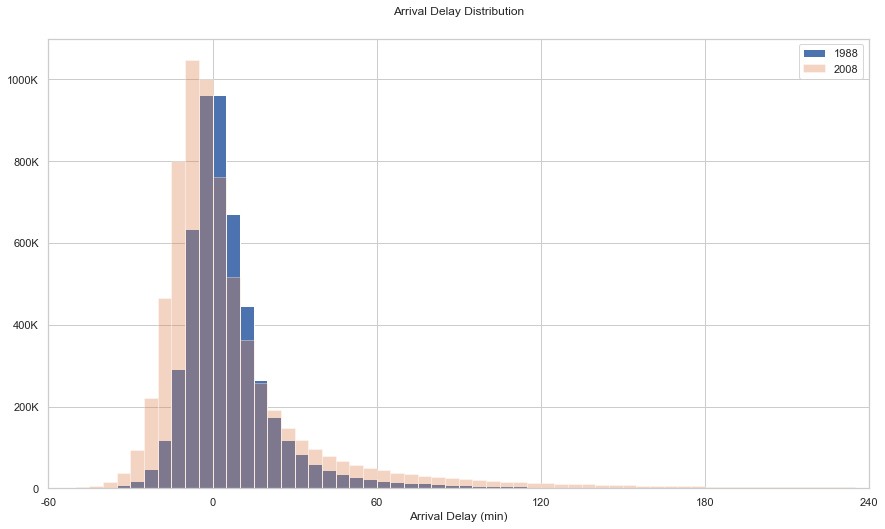

In [16]:
# Starting with a histogram comparing arrival delays from 1988 vs 2008
bin = np.arange(-100, 240, 5)
plt.figure(figsize=[14.70, 8.27])
plt.hist(data=flights1988, x="ArrDelay", bins=bin, label='1988')
plt.hist(data=flights2008, x="ArrDelay", alpha=.35, bins=bin, label=('2008'))
plt.title("Arrival Delay Distribution", y = 1.04)
plt.xlabel("Arrival Delay (min)")
plt.xlim(-60,240)
plt.xticks(np.arange(-60,300,60),np.arange(-60,300,60))
plt.yticks(np.arange(0,1200000,200000),[0,"200K","400K","600K","800K","1000K"])
plt.legend(loc='upper right');


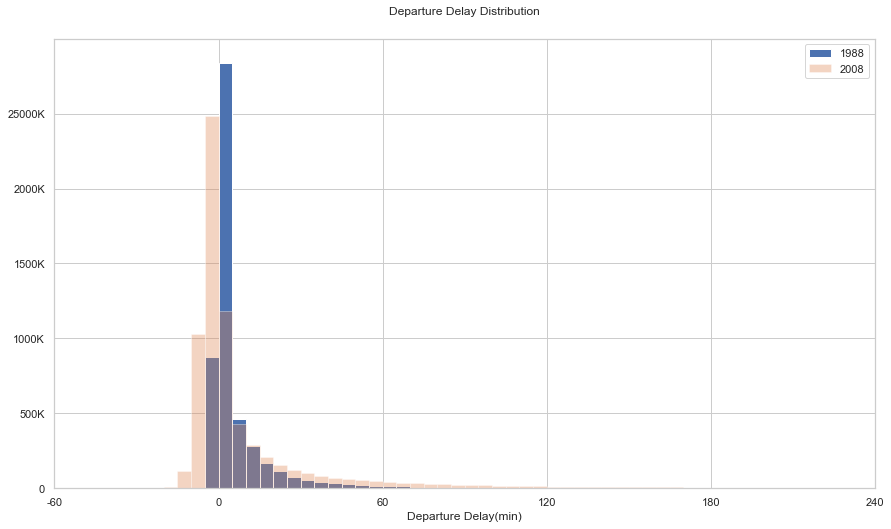

In [19]:
# now I'm taking a look at departure delays
bin = np.arange(-100, 240, 5)
plt.figure(figsize=[14.70, 8.27])
plt.hist(data=flights1988, x="DepDelay",bins=bin, label='1988')
plt.hist(data=flights2008, x="DepDelay",bins=bin, label='2008', alpha=.35)
plt.title("Departure Delay Distribution", y = 1.04)
plt.xlabel("Departure Delay(min)")
plt.xlim(-60,240)
plt.ylim(0,3000000)
plt.xticks(np.arange(-60,300,60),np.arange(-60,300,60))
plt.yticks(np.arange(0,3000000,500000),[0,"500K","1000K","1500K","2000K","25000K"])
plt.legend(loc='upper right');


## Bivariate Explorations

### How often do the delays occur?

It looks like the NAS delay happened most frequently, at roughly 13%.  Late aircraft and carrier delay have about the same occurance, at around 10%.  To my surprise, a weather delay only accounted for roughly 1.5% of delay occurances.  A delay due to security was virtually non-existent; I will exclude these from all future explorations and visualizations.

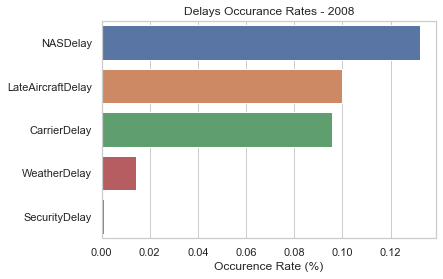

In [56]:
# The proportion where each type of delay occurs.
p_car = flights2008[(~flights2008.CarrierDelay.isnull()) & (flights2008.CarrierDelay!=0)].shape[0] / flights2008.shape[0]
p_wea = flights2008[(~flights2008.WeatherDelay.isnull()) & (flights2008.WeatherDelay!=0)].shape[0] / flights2008.shape[0]
p_nas = flights2008[(~flights2008.NASDelay.isnull()) & (flights2008.NASDelay!=0)].shape[0] / flights2008.shape[0]
p_sec = flights2008[(~flights2008.SecurityDelay.isnull()) & (flights2008.SecurityDelay!=0)].shape[0] / flights2008.shape[0]
p_airc = flights2008[(~flights2008.LateAircraftDelay.isnull()) & (flights2008.LateAircraftDelay!=0)].shape[0] / flights2008.shape[0]

delays = pd.Series([p_nas,p_airc,p_car,p_wea,p_sec], index=["NASDelay","LateAircraftDelay","CarrierDelay","WeatherDelay","SecurityDelay"]).sort_values(ascending=False)
sns.barplot(delays, delays.index)
plt.title("Delays Occurance Rates - 2008")
plt.xlabel("Occurence Rate (%)");

In [57]:
# data wrangling, removing inconsistent or missing data.
df = flights2008.copy()

df = df[(df.Cancelled==0) & (df.Diverted==0)]
df["delay_elapsed"] = df.ActualElapsedTime - df.CRSElapsedTime
df = df[ ~(df.index.isin([2486419,3698229])) ]
df = df[df.AirTime != 0]
df = df[(df.DepDelay > -120)]
hawaii = ["HNL", "OGG", "KOA"]
df = df[~df.isin(hawaii)]

df.shape[0]

6855011

In [58]:
# creating alternate df to create bivariate and multivariate plots based on delay type
alternate = pd.DataFrame()
delay_types = ["NASDelay","LateAircraftDelay","CarrierDelay","WeatherDelay"]

for type in delay_types:
    alt = pd.DataFrame()
    alt["time"] = df[(df[type] != 0) & (~df[type].isnull())][type]
    alt["DepDelay"] = df[(df[type] != 0) & (~df[type].isnull())]["DepDelay"]
    alt["delay_elapsed"] = df[(df[type] != 0) & (~df[type].isnull())]["delay_elapsed"]
    alt["ArrDelay"] = df[(df[type] != 0) & (~df[type].isnull())]["ArrDelay"]
    alt["Distance"] = df[(df[type] != 0) & (~df[type].isnull())]["Distance"]
    alt["Delay Factor"] = type
    alternate = alternate.append(alt)
  
bin_edges1 = np.arange(0,600,200)
bin_edges2 = np.arange(0,2000,400)
alternate["elapsed_blocked"] = pd.cut(alternate.delay_elapsed, bin_edges1, right=False, include_lowest=True)
alternate["depdelay_blocked"] = pd.cut(alternate.DepDelay, bin_edges2, right=False, include_lowest=True)

### How is the length of the delay distributed?

The left boxplot makes it difficult to see the specifics within the box, but it allows you to see how extensive some of the outliers can be; a delay lasting nearly 2 days is nothing to joke about.  The distribution of the zoomed in boxplot on the right is actually very consistent with eachother, despite the much higher outliers for Carrier Delay.

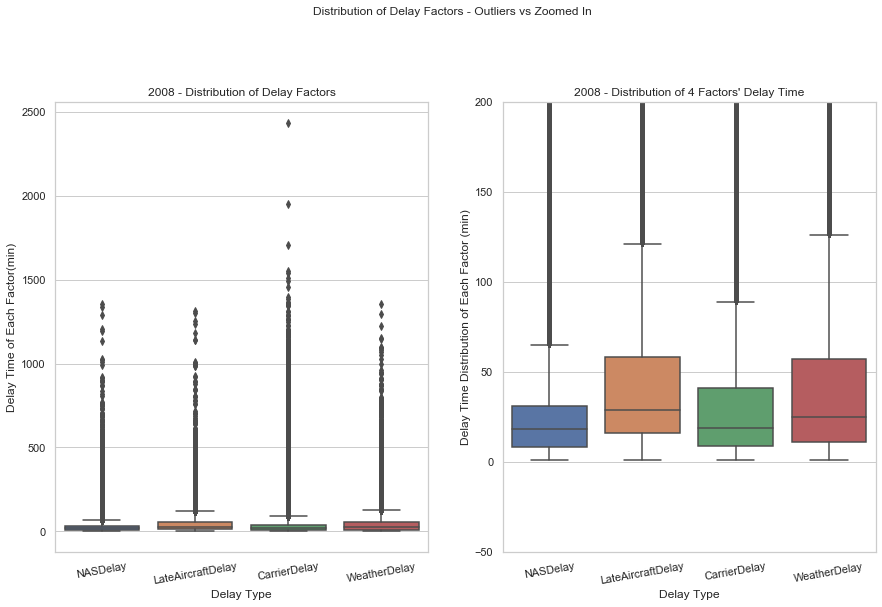

In [59]:
# taking a look at the distribution on how many minutes each delay factor can prolong the flight time
plt.figure(figsize=[14.70, 8.27])

plt.subplot(1,2,1)
plt.suptitle('Distribution of Delay Factors - Outliers vs Zoomed In', y = 1.04)
plt.title("2008 - Distribution of Delay Factors")
sns.boxplot(data= alternate, x="Delay Factor", y="time")
plt.xlabel("Delay Type")
plt.ylabel("Delay Time of Each Factor(min)")
plt.xticks(rotation=10);

plt.subplot(1,2,2)
plt.title("2008 - Distribution of 4 Factors' Delay Time")
sns.boxplot(data= alternate, x="Delay Factor", y="time")
plt.xlabel("Delay Type")
plt.ylabel("Delay Time Distribution of Each Factor (min)")
plt.ylim([-50,200])
plt.xticks(rotation=10);

### Is there any correlations between length of flight and the length of the delay?

It's interesting when comparing the length of the flight to the length of the delay.  I would assume that longer delays would be associated with longer flights; however, the plots below show no such relation.  It's also possible that the sample size of shorter flights causes the plots to skew to the right, when in fact there is just many more shorter flights, as opposed to 2,500km + flights.

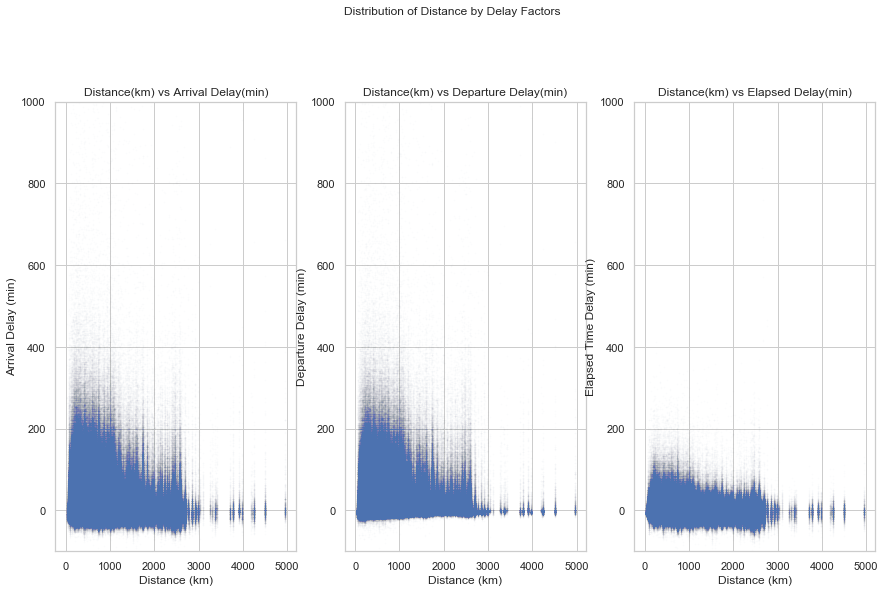

In [60]:

plt.figure(figsize=[14.70, 8.27])
plt.suptitle('Distribution of Distance by Delay Factors', y = 1.04)

plt.subplot(1,3,1)
plt.title("Distance(km) vs Arrival Delay(min)")
plt.scatter(data=df, x="Distance", y="ArrDelay", s=0.5, alpha=0.01)
plt.xlabel("Distance (km)")
plt.ylabel("Arrival Delay (min)")
plt.ylim([-100,1000]);

plt.subplot(1,3,2)
plt.title("Distance(km) vs Departure Delay(min)")
plt.scatter(data=df, x="Distance", y="DepDelay", s=0.5, alpha=0.01)
plt.xlabel("Distance (km)")
plt.ylabel("Departure Delay (min)")
plt.ylim([-100,1000]);

plt.subplot(1,3,3)
plt.title("Distance(km) vs Elapsed Delay(min)")
plt.scatter(data=df, x="Distance", y="delay_elapsed", s=0.5, alpha=0.01)
plt.xlabel("Distance (km)")
plt.ylabel("Elapsed Time Delay (min)")
plt.ylim([-100,1000]);

### Does the distance of trip show any variability when looking at the delays by type?

These plots supports the fact which was revealed in the last section. Even if I break these delays down into 4 factors, these do not show the clear relationship with distance.

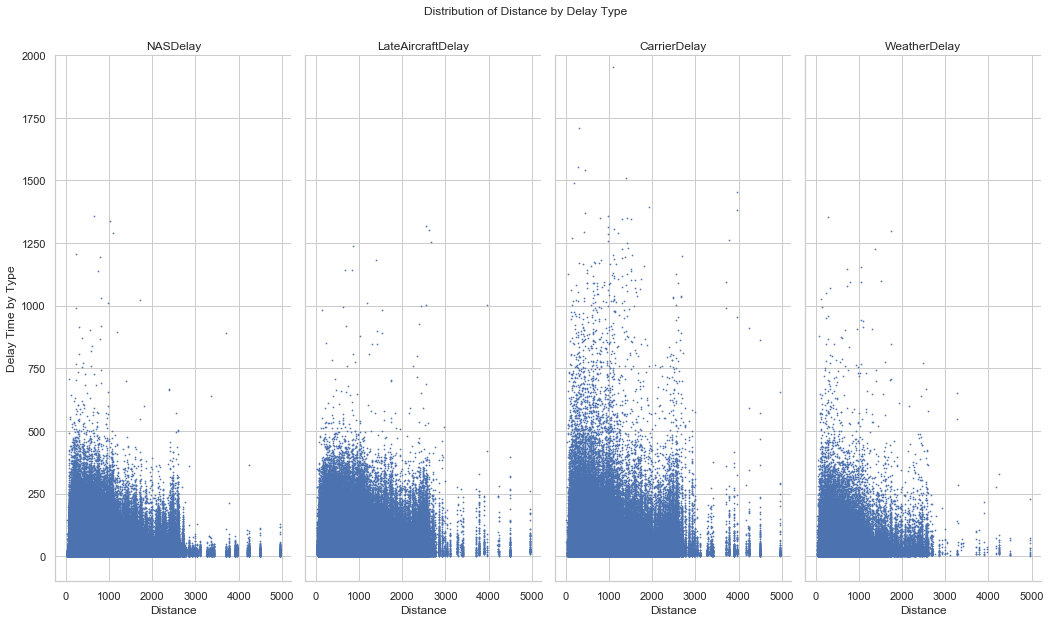

In [65]:
df2 = sns.FacetGrid(data=alternate, col="Delay Factor", height = 8.27, aspect = (14.7/4/8.27))
df2.map(plt.scatter, "Distance", "time", s=0.5)
df2.set_ylabels("Delay Time by Type")
df2.set_titles("{col_name}")
plt.suptitle('Distribution of Distance by Delay Type', y = 1.04)
plt.ylim([-100,2000]);

## Multivariate Explorations

### How does each delay type look when breaking the length of departure delay into segments?

This is very interesting; Carrier Delay and Weather delay weren't the most commom of the delays.  However, as the length of the delays increases, the more likely it is to be a carrier or weather delay.

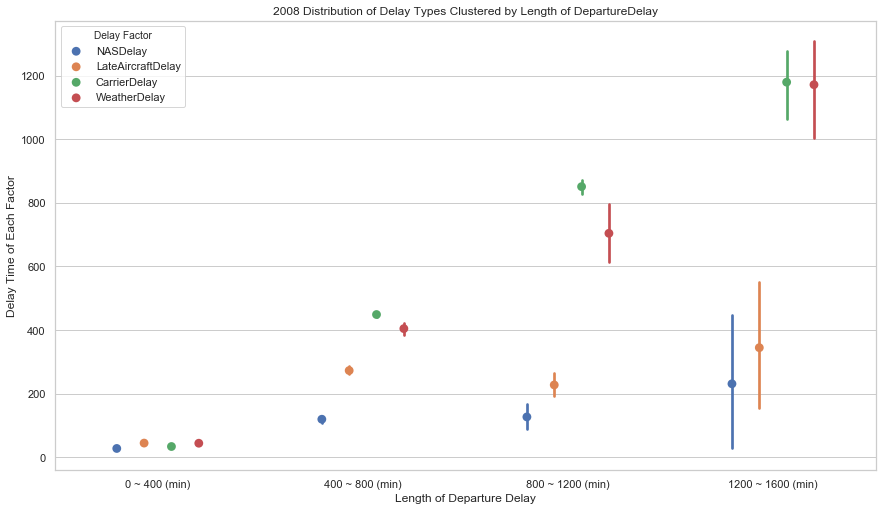

In [69]:
plt.figure(figsize=[14.70, 8.27])
sns.pointplot(data=alternate, hue="Delay Factor", y="time", x="depdelay_blocked", linestyles="", dodge=0.4)
plt.title("2008 Distribution of Delay Types Clustered by Length of DepartureDelay")
plt.xlabel("Length of Departure Delay")
plt.ylabel("Delay Time of Each Factor")
plt.xticks([0,1,2,3],["0 ~ 400 (min)","400 ~ 800 (min)", "800 ~ 1200 (min)","1200 ~ 1600 (min)"]);

### How does each delay type look when breaking the total elapsed delay into segments?

An NAS Delay really sticks out as being the main contributor in this visualization.

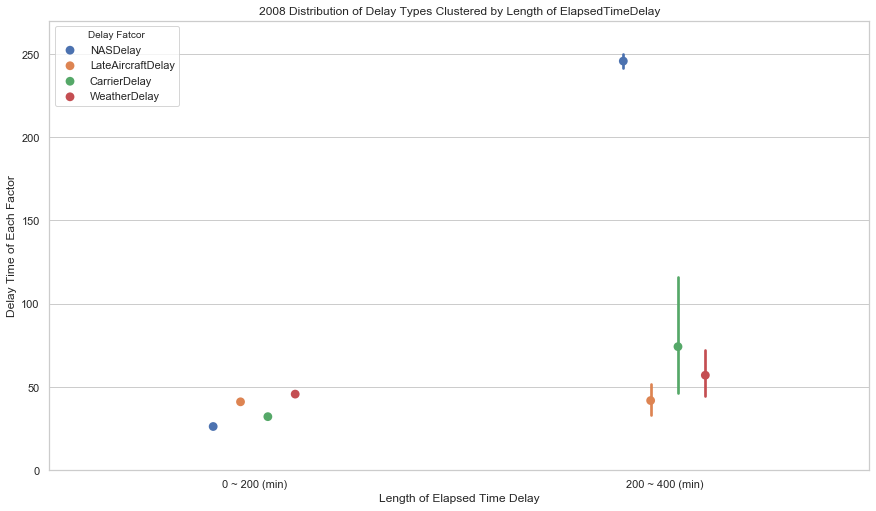

In [70]:
plt.figure(figsize=[14.70, 8.27])
sns.pointplot(data=alternate, hue="Delay Factor", y="time", x="elapsed_blocked", linestyles="", dodge=0.2)
plt.title("2008 Distribution of Delay Types Clustered by Length of ElapsedTimeDelay")
plt.xlabel("Length of Elapsed Time Delay")
plt.ylabel("Delay Time of Each Factor")
plt.legend(title="Delay Fatcor", loc='upper left')
plt.xticks([0,1],["0 ~ 200 (min)","200 ~ 400 (min)"])
plt.ylim([0,270]);

That concludes my exploration and visualization project for the 1988 and 2008 flight data, provided by RITA.

## Exploration Summary

- I had some assumptions going into my exploration of the flights data and I was quite surprised on a number of them. After comparing the 1988 and 2008 datasets at the initial part of my exploration, I decided for dig deeper into the 2008 dataset, as they were both very similar. Probably the biggest thing that surprised me, despite how often you hear about delays at the airport, is that flights in 2008 on average are departing and arriving a few minutes early.
- Another aspect of the analysis that surprised me was how little weather delays affected the total data set. I am from Michigan so I'm accustomed to weather delaying things during the winter months; however, Weather Delays only accounted for 1.5% of all delays in the 2008 data set.
- Going in, I just assumed that a longer flight meant the delays could be quite extensive; however, I found that to be quite the opposite. The highest average of delay times come from flights less than 750km. There are many factors that can go into causing a delay. It's possible that airlines have just failed to attack this problem due to a lack of demand to correct it. Perhaps consumers aren't as concerned about leaving a few minutes late when their total flight time is only two hours. This if of course just one perspective when looking at this specific analysis.
- In summary, despite huge technological advances in the world, many things about air travel have remained the same. I'd be interested to dig into a 2019 flight dataset; however, 2008 was the last one available on the RITA website. Safety is the main concern for air travel; if we're able to average arriving a few minutes early, I'd consider that a huge success.